<a href="https://colab.research.google.com/github/shubham7423/Amazing-Feature-Engineering/blob/master/Copy_of_Copy_of_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/cotton-disease/data.zip -d data/

Archive:  drive/My Drive/cotton-disease/data.zip
   creating: data/data/
  inflating: data/__MACOSX/._data    
   creating: data/data/test/
   creating: data/data/train/
   creating: data/data/val/
   creating: data/data/test/diseased cotton plant/
   creating: data/data/test/test data comp files/
   creating: data/data/test/diseased cotton leaf/
   creating: data/data/test/fresh cotton leaf/
   creating: data/data/test/fresh cotton plant/
   creating: data/data/train/diseased cotton plant/
   creating: data/data/train/diseased cotton leaf/
   creating: data/data/train/fresh cotton leaf/
   creating: data/data/train/fresh cotton plant/
   creating: data/data/val/diseased cotton plant/
   creating: data/data/val/diseased cotton leaf/
   creating: data/data/val/fresh cotton leaf/
   creating: data/data/val/fresh cotton plant/
  inflating: data/data/test/diseased cotton plant/dd (513).jpg  
  inflating: data/__MACOSX/data/test/diseased cotton plant/._dd (513).jpg  
  inflating: data/data/

In [ ]:
import glob
import cv2
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.utils import shuffle
import pickle
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Import train data
train_imagePaths = glob.glob('data/data/train/*/*')
train_labels = []
train_images = []
print("=> Loading Training images")
for i,imagePath in enumerate(train_imagePaths):
    train_labels.append(imagePath.split('/')[-2])
    image = cv2.imread(imagePath)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (224, 224))
    image = preprocess_input(image)
    # image = np.repeat(image[..., np.newaxis], 3, -1)
    train_images.append(image)
    
train_images = np.array(train_images)
train_labels = np.array(train_labels)
print("=> Loaded {} train images".format(train_images.shape[0]))
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)

# Import test data
test_imagePaths = glob.glob('data/data/test/*/*')
test_labels = []
test_images = []
print("=> Loading Test images")
for i,imagePath in enumerate(test_imagePaths):
    test_labels.append(imagePath.split('/')[-2])
    image = cv2.imread(imagePath)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (224, 224))
    image = preprocess_input(image)
    # image = np.repeat(image[..., np.newaxis], 3, -1)
    test_images.append(image)
    
test_images = np.array(test_images)
test_labels = np.array(test_labels)
print("=> Loaded {} test images".format(test_images.shape[0]))
test_labels = lb.transform(test_labels)

# Import validation data
val_imagePaths = glob.glob('data/data/val/*/*')
val_labels = []
val_images = []
print("=> Loading Validation images")
for i,imagePath in enumerate(val_imagePaths):
    val_labels.append(imagePath.split('/')[-2])
    image = cv2.imread(imagePath)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (224, 224))
    image = preprocess_input(image)
    # image = np.repeat(image[..., np.newaxis], 3, -1)
    val_images.append(image)
    
val_images = np.array(val_images)
val_labels = np.array(val_labels)
print("=> Loaded {} validation images".format(val_images.shape[0]))
val_labels = lb.transform(val_labels)

train_images, train_labels = shuffle(train_images, train_labels)
test_images, test_labels = shuffle(test_images, test_labels)
val_images, val_labels = shuffle(val_images, val_labels)

# np.save("drive/My Drive/cotton-disease/processed_data/train_images", train_images)
# np.save("drive/My Drive/cotton-disease/processed_data/train_labels", train_labels)
# np.save("drive/My Drive/cotton-disease/processed_data/test_images", test_images)
# np.save("drive/My Drive/cotton-disease/processed_data/test_labels", test_labels)
# np.save("drive/My Drive/cotton-disease/processed_data/val_images", val_images)
# np.save("drive/My Drive/cotton-disease/processed_data/val_labels", val_labels)

# pickle.dump(lb, open('drive/My Drive/cotton-disease/preprocessing/lb.pkl', 'wb'))
# print("=> Processed Images stored in processed_data/")

=> Loading Training images
=> Loaded 1951 train images
=> Loading Test images
=> Loaded 36 test images
=> Loading Validation images
=> Loaded 324 validation images


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dense, Dropout, Flatten, ZeroPadding2D, Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import ResNet152V2, InceptionV3, Xception
from keras import backend as K

In [ ]:
K.set_learning_phase(0)
# model = InceptionV3(input_shape=(229, 229, 3), weights=None, classes=4)
base_model = InceptionV3(weights=None, include_top=False, input_shape=(229, 229, 3))
    
    # add a global spatial average pooling layer
x = Flatten()(base_model.output)
# x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
# x = Dense(4096, activation='relu')(x)
    # and a logistic layer -- let's say we have 200 classes
predictions = Dense(4, activation='softmax')(x)
for layer in base_model.layers:
    layer.trainable = True

    # this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
X = np.concatenate([train_images, val_images, test_images])
y = np.concatenate([train_labels, val_labels, test_labels])
X.shape, y.shape

((2311, 224, 224, 3), (2311, 4))

In [ ]:
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator


checkpoint = ModelCheckpoint("vgg16.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=1, mode='min')
# model = VGG_16()
#compile model
EPOCHS = 400
BS = 32
# SGD()
opt = SGD(learning_rate=0.00001, momentum=0.9, nesterov=True, decay=1e-10)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

training_dataset = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")
testing_dataset = ImageDataGenerator()

print("=> Training model")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)
training = training_dataset.flow(X_train, y_train, batch_size=32)
testing = testing_dataset.flow(X_test, y_test, batch_size=32)
r = model.fit(training, 
              validation_data=testing,
              steps_per_epoch=len(X_train)//BS,
              validation_steps=len(X_test)//BS,
              epochs=EPOCHS,
              callbacks=[checkpoint, early]
              )

=> Training model
Epoch 1/400
61/61 [==============================] - ETA: 0s - loss: 1.3675 - accuracy: 0.3753
Epoch 00001: val_loss improved from inf to 1.32468, saving model to vgg16.h5
61/61 [==============================] - 23s 384ms/step - loss: 1.3675 - accuracy: 0.3753 - val_loss: 1.3247 - val_accuracy: 0.3719
Epoch 2/400
61/61 [==============================] - ETA: 0s - loss: 1.2360 - accuracy: 0.4565
Epoch 00002: val_loss did not improve from 1.32468
61/61 [==============================] - 21s 344ms/step - loss: 1.2360 - accuracy: 0.4565 - val_loss: 1.4048 - val_accuracy: 0.3719
Epoch 3/400
61/61 [==============================] - ETA: 0s - loss: 1.1517 - accuracy: 0.5140
Epoch 00003: val_loss did not improve from 1.32468
61/61 [==============================] - 21s 337ms/step - loss: 1.1517 - accuracy: 0.5140 - val_loss: 1.4638 - val_accuracy: 0.3688
Epoch 4/400
61/61 [==============================] - ETA: 0s - loss: 1.1134 - accuracy: 0.5274
Epoch 00004: val_loss did n

In [ ]:
model.load_weights('drive/My Drive/cotton-disease/model_final_c.h5')

In [ ]:
r = model.fit(training, 
              validation_data=testing,
              steps_per_epoch=len(X_train)//BS,
              validation_steps=len(X_test)//BS,
              epochs=EPOCHS,
              callbacks=[checkpoint, early]
              )

Epoch 1/400
61/61 [==============================] - ETA: 0s - loss: 0.2521 - accuracy: 0.8975
Epoch 00001: val_loss improved from 0.23684 to 0.21284, saving model to vgg16.h5
61/61 [==============================] - 23s 370ms/step - loss: 0.2521 - accuracy: 0.8975 - val_loss: 0.2128 - val_accuracy: 0.9156
Epoch 2/400
61/61 [==============================] - ETA: 0s - loss: 0.2425 - accuracy: 0.9053
Epoch 00002: val_loss improved from 0.21284 to 0.20426, saving model to vgg16.h5
61/61 [==============================] - 23s 369ms/step - loss: 0.2425 - accuracy: 0.9053 - val_loss: 0.2043 - val_accuracy: 0.9219
Epoch 3/400
61/61 [==============================] - ETA: 0s - loss: 0.2259 - accuracy: 0.8965
Epoch 00003: val_loss did not improve from 0.20426
61/61 [==============================] - 22s 354ms/step - loss: 0.2259 - accuracy: 0.8965 - val_loss: 0.2158 - val_accuracy: 0.9219
Epoch 4/400
61/61 [==============================] - ETA: 0s - loss: 0.2491 - accuracy: 0.8975
Epoch 00004

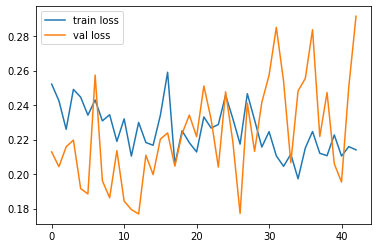

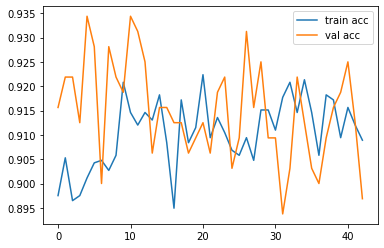

In [ ]:
import matplotlib.pyplot as plt


# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss_1')
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('AccVal_acc_1')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 1s 76ms/step - loss: 0.2867 - accuracy: 0.9020


[0.28670573234558105, 0.9020172953605652]

In [ ]:
model.save('drive/My Drive/cotton-disease/model_final_c.h5')

In [ ]:
r.history.keys()

AttributeError: ignored

In [ ]:
import pandas as pd


In [ ]:
history = pd.DataFrame(r.history)
history

,loss,accuracy,val_loss,val_accuracy
0,1.383286,0.382505,1.360479,0.225000
1,1.160090,0.484990,1.369261,0.228125
2,1.117265,0.535714,1.455323,0.218750
3,1.088246,0.529503,1.403159,0.287500
4,1.079251,0.534162,1.531600,0.290625
...,...,...,...,...
195,0.224064,0.912526,0.267250,0.890625
196,0.238043,0.904762,0.235857,0.903125
197,0.231586,0.909938,0.262632,0.887500
198,0.216123,0.908385,0.268646,0.893750


In [ ]:
history.to_csv('drive/My Drive/cotton-disease/history.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator


checkpoint = ModelCheckpoint("vgg16.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=25, verbose=1, mode='min')
# model = VGG_16()
#compile model
EPOCHS = 400
BS = 32
# SGD()
opt = SGD(learning_rate=0.00001, momentum=0.9, nesterov=True, decay=1e-10)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

training_dataset = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")
testing_dataset = ImageDataGenerator()

print("=> Training model")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)
training = training_dataset.flow(X_train, y_train, batch_size=32)
testing = testing_dataset.flow(X_test, y_test, batch_size=32)
r = model.fit(training, 
              validation_data=testing,
              steps_per_epoch=len(X_train)//BS,
              validation_steps=len(X_test)//BS,
              epochs=EPOCHS,
              callbacks=[checkpoint, early]
              )

=> Training model
Epoch 1/400
61/61 [==============================] - ETA: 0s - loss: 1.3748 - accuracy: 0.3789
Epoch 00001: val_loss improved from inf to 1.34762, saving model to vgg16.h5
61/61 [==============================] - 29s 477ms/step - loss: 1.3748 - accuracy: 0.3789 - val_loss: 1.3476 - val_accuracy: 0.2562
Epoch 2/400
61/61 [==============================] - ETA: 0s - loss: 1.0747 - accuracy: 0.5419
Epoch 00002: val_loss did not improve from 1.34762
61/61 [==============================] - 23s 375ms/step - loss: 1.0747 - accuracy: 0.5419 - val_loss: 1.6292 - val_accuracy: 0.2531
Epoch 3/400
61/61 [==============================] - ETA: 0s - loss: 0.9508 - accuracy: 0.5942
Epoch 00003: val_loss did not improve from 1.34762
61/61 [==============================] - 23s 369ms/step - loss: 0.9508 - accuracy: 0.5942 - val_loss: 1.8786 - val_accuracy: 0.2562
Epoch 4/400
61/61 [==============================] - ETA: 0s - loss: 0.8933 - accuracy: 0.6330
Epoch 00004: val_loss did n

In [ ]:
# ResNet152V2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
K.set_learning_phase(0)
# model = InceptionV3(input_shape=(229, 229, 3), weights=None, classes=4)
base_model = ResNet152V2(weights=None, include_top=False, input_shape=(224, 224, 3))
    
    # add a global spatial average pooling layer
x = Flatten()(base_model.output)
# x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
# x = Dense(4096, activation='relu')(x)
    # and a logistic layer -- let's say we have 200 classes
predictions = Dense(4, activation='softmax')(x)
for layer in base_model.layers:
    layer.trainable = True

    # this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator


checkpoint = ModelCheckpoint("vgg16.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=25, verbose=1, mode='min')
# model = VGG_16()
#compile model
EPOCHS = 400
BS = 32
# SGD()
opt = SGD(learning_rate=0.00001, momentum=0.9, nesterov=True, decay=1e-10)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

training_dataset = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")
testing_dataset = ImageDataGenerator()

print("=> Training model")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)
training = training_dataset.flow(X_train, y_train, batch_size=32)
testing = testing_dataset.flow(X_test, y_test, batch_size=32)
r = model.fit(training, 
              validation_data=testing,
              steps_per_epoch=len(X_train)//BS,
              validation_steps=len(X_test)//BS,
              epochs=EPOCHS,
              callbacks=[checkpoint, early]
              )

=> Training model
Epoch 1/400
61/61 [==============================] - ETA: 0s - loss: 1.4215 - accuracy: 0.3670
Epoch 00001: val_loss improved from inf to 1.34832, saving model to vgg16.h5
61/61 [==============================] - 31s 504ms/step - loss: 1.4215 - accuracy: 0.3670 - val_loss: 1.3483 - val_accuracy: 0.2656
Epoch 2/400
61/61 [==============================] - ETA: 0s - loss: 1.2458 - accuracy: 0.4141
Epoch 00002: val_loss did not improve from 1.34832
61/61 [==============================] - 25s 413ms/step - loss: 1.2458 - accuracy: 0.4141 - val_loss: 1.3897 - val_accuracy: 0.3031
Epoch 3/400
61/61 [==============================] - ETA: 0s - loss: 1.2194 - accuracy: 0.4394
Epoch 00003: val_loss did not improve from 1.34832
61/61 [==============================] - 25s 413ms/step - loss: 1.2194 - accuracy: 0.4394 - val_loss: 1.3883 - val_accuracy: 0.3531
Epoch 4/400
61/61 [==============================] - ETA: 0s - loss: 1.2152 - accuracy: 0.4550
Epoch 00004: val_loss did n

In [ ]:
model.summary()

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________